# HW3 Assignment 1

In [2]:
from __future__ import print_function
from scipy.optimize import curve_fit, minimize
import numpy as np
import pylab as pl
import matplotlib.mlab as mlab
  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# list of the distributions to be analized
distributions = [ 'chisq', 'pois', 'gaus', 'cauchy', 'lnorm', 'binomial']

# mean adopted for the analysis
mymean = 100

#creating an empty dictionary to store all my distributions
md = {}

### a) Chi-squared

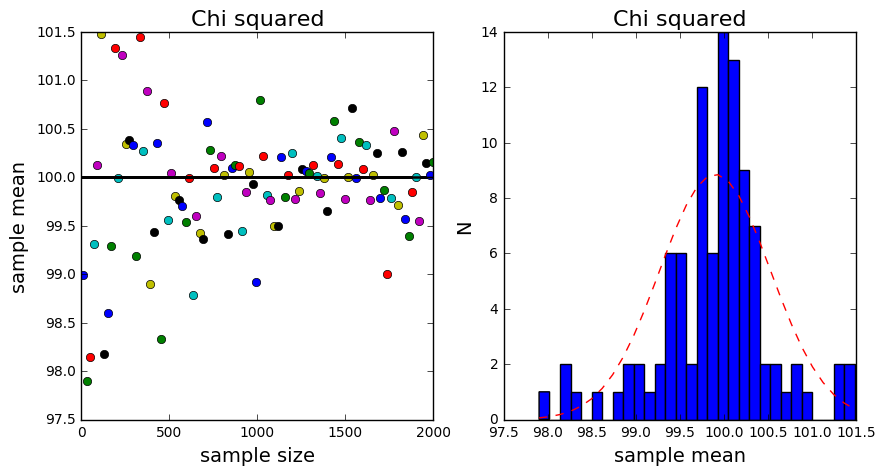

In [5]:
# Defining a seed for the random values
np.random.seed(247)

# the method that generates a chi-squared distribution takes two paramenters as arguments: 
# degrees of freedom, which equals the mean of the distribution; and sample size, which we want to vary from 10 to 2000. 
df = mymean

# creating 100 chi sq distributions that with sizes between 10 and 2000
mysize = np.linspace(11, 2000, 100).astype(int)

md['chisq'] = {}
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,5)).add_subplot(121)

for nn in mysize:
    md['chisq']['means'][nn] = md['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size', fontsize=14)
    axchisq_mu_n.set_ylabel('sample mean', fontsize=14)
    axchisq_mu_n.set_title('Chi squared', fontsize=16)
    axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

pl.subplot(122)
count, bins, patches = pl.hist(md['chisq']['means'].values(),bins=30)
pl.title('Chi squared', fontsize=16)
pl.xlabel('sample mean', fontsize = 14)
pl.ylabel('N', fontsize = 14)
vmeans = np.array(md['chisq']['means'].values())
y = max(count) * mlab.normpdf(bins, vmeans.mean(), vmeans.std())
pl.plot(bins, y, 'r--')



##### Figure 1: Ilustration of the Law of Large Numbers for the Chi-square distribution. As the sample size increases, the sample mean tends to be closer to the mean of the actual population (expected value = mymean). Besides that, by adding more distributions of bigger sizes, the distribution of means, becomes each time closer to a normal distribution around the actual mean (of the population).

array([  1.,   0.,   2.,   1.,   0.,   1.,   0.,   1.,   2.,   2.,   1.,
         2.,   6.,   6.,   2.,  12.,   6.,  14.,  13.,   9.,   7.,   2.,
         2.,   1.,   2.,   1.,   0.,   0.,   2.,   2.])

### b) Poisson

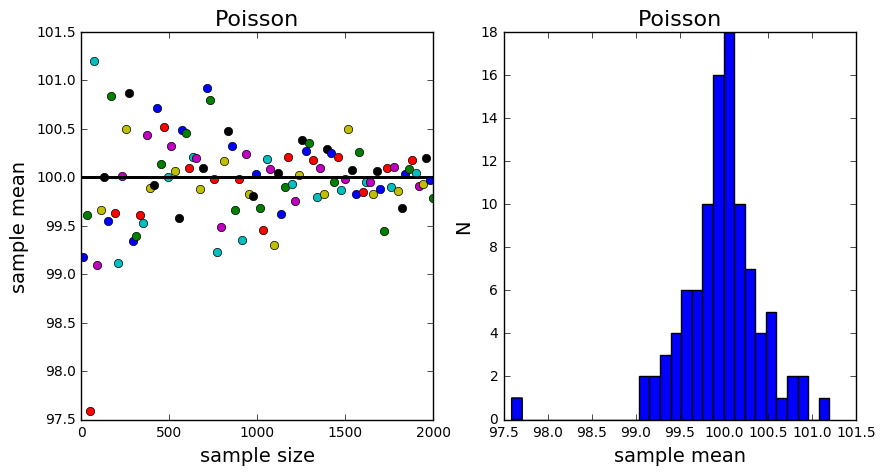

In [82]:
# Defining a seed for the random values
np.random.seed(247)

# the method that generates a poisson distribution takes two paramenters as arguments: 
# lambda, which equals the mean of the distribution; and sample size, which we want to vary from 10 to 2000. 
lam = mymean

# creating 100 poisson distributions with sizes between 10 and 2000
mysize = np.linspace(11, 2000, 100).astype(int)

md['pois'] = {}
for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,5)).add_subplot(121)

for nn in mysize:
    md['pois']['means'][nn] = md['pois'][nn].mean()
    axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
    axpois_mu_n.set_xlabel('sample size', fontsize=14)
    axpois_mu_n.set_ylabel('sample mean', fontsize=14)
    axpois_mu_n.set_title('Poisson', fontsize=16)
    axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')
    
pl.subplot(122)
pl.hist(md['pois']['means'].values(),bins=30)
pl.title('Poisson', fontsize=16)
pl.xlabel('sample mean', fontsize = 14)
pl.ylabel('N', fontsize = 14)    


##### Figure 2: Ilustration of the Law of Large Numbers for the Poisson distribution. As the sample size increases, the sample mean tends to be closer to the mean of the actual population (expected value = mymean). Besides that, by adding more distributions of bigger sizes, the distribution of means, becomes each time closer to a normal distribution around the actual mean (of the population).

### c) Normal 

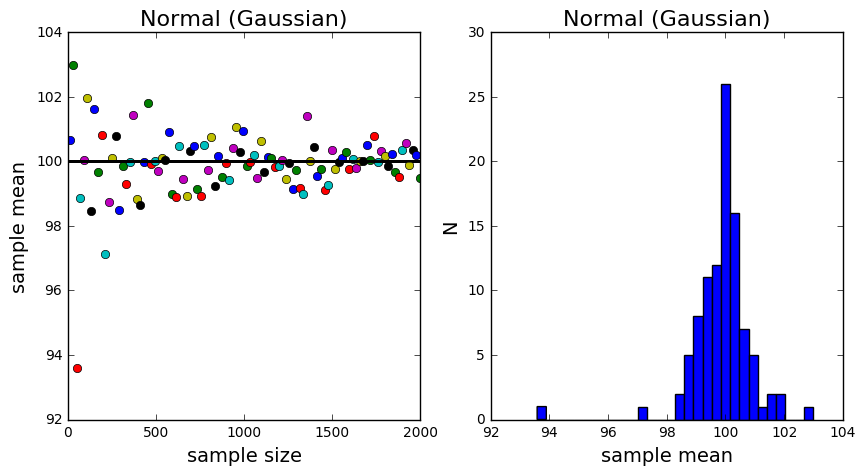

In [85]:
# Defining a seed for the random values
np.random.seed(247)

# the method that generates a normal (Gaussian) distribution takes three paramenters as arguments: 
# loc, which equals the mean of the distribution; scale, which accounts for the std deviation;
# and sample size, which we want to vary from 10 to 2000. 
mu = mymean
sigma = 20.0  #arbitrarily chosen std deviation, considering that mu = 100. 

# creating 100 normal distributions with sizes between 10 and 2000
mysize = np.linspace(11, 2000, 100).astype(int)

md['gaus'] = {}
for n in mysize:
    md['gaus'][n] = np.random.normal(mu, sigma, size = n)

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,5)).add_subplot(121)

for nn in mysize:
    md['gaus']['means'][nn] = md['gaus'][nn].mean()
    axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
    axgaus_mu_n.set_xlabel('sample size', fontsize=14)
    axgaus_mu_n.set_ylabel('sample mean', fontsize=14)
    axgaus_mu_n.set_title('Normal (Gaussian)', fontsize=16)
    axgaus_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')
    
pl.subplot(122)
pl.hist(md['gaus']['means'].values(),bins=30)
pl.title('Normal (Gaussian)', fontsize=16)
pl.xlabel('sample mean', fontsize = 14)
pl.ylabel('N', fontsize = 14)    

##### Figure 3: Ilustration of the Law of Large Numbers for the Normal (Gaussian) distribution. As the sample size increases, the sample mean tends to be closer to the mean of the actual population (expected value = mymean). Besides that, by adding more distributions of bigger sizes, the distribution of means, becomes each time closer to a normal distribution  around the actual mean (of the population).

### d) Binomial

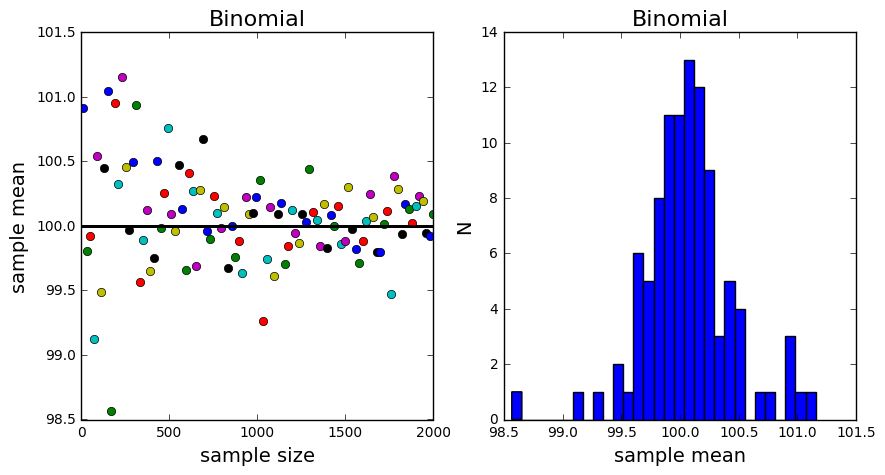

In [87]:
# Defining a seed for the random values
np.random.seed(247)

# the method that generates a binomial distribution takes three paramenters as arguments: 
# n, which represents a "number of trials"; p, which represent the "probability of success on each trial";
# and sample size, which we want to vary from 10 to 2000.
# the mean of the distribution is given by mean = n*p. Therefore, in order to generate a distribution with mean = 100,
# we need to make sure that n*p = 100, for example:
trials = 400
p = 0.25
  
# creating 100 normal distributions with sizes between 10 and 2000
mysize = np.linspace(11, 2000, 100).astype(int)

md['binomial'] = {}
for n in mysize:
    md['binomial'][n] = np.random.binomial(trials, p, size = n)

md['binomial']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,5)).add_subplot(121)

for nn in mysize:
    md['binomial']['means'][nn] = md['binomial'][nn].mean()
    axbinom_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
    axbinom_mu_n.set_xlabel('sample size', fontsize=14)
    axbinom_mu_n.set_ylabel('sample mean', fontsize=14)
    axbinom_mu_n.set_title('Binomial', fontsize=16)
    axbinom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
    
pl.subplot(122)
pl.hist(md['binomial']['means'].values(),bins=30)
pl.title('Binomial', fontsize=16)
pl.xlabel('sample mean', fontsize = 14)
pl.ylabel('N', fontsize = 14)    

##### Figure 4: Ilustration of the Law of Large Numbers for the Binomial distribution. As the sample size increases, the sample mean tends to be closer to the mean of the actual population (expected value = mymean). Besides that, by adding more distributions of bigger sizes, the distribution of means, becomes each time closer to a normal distribution around the actual mean (of the population).

### e) Lognormal

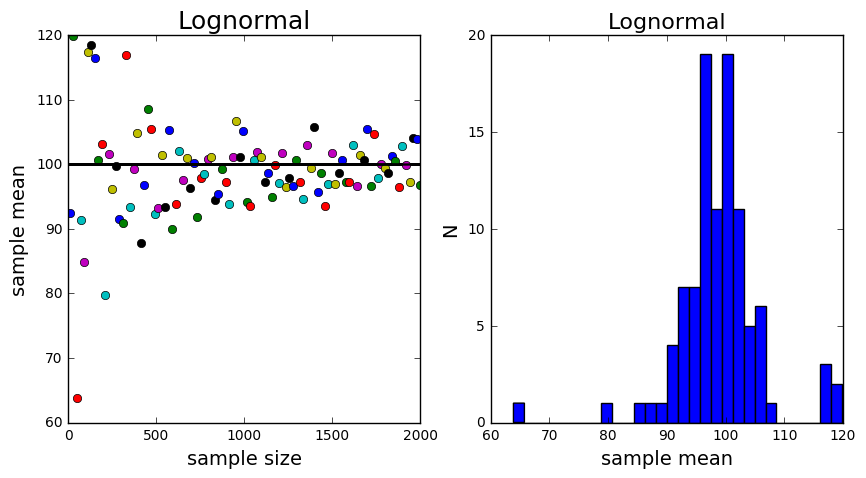

In [88]:
# Defining a seed for the random values
np.random.seed(247)

# the method that generates a lognormal distribution takes three paramenters as arguments: 
# mu, which represents mean of the associated normal distribution (of the variable's logarithm); 
# sigma, which represents the std deviation of the associated normal distribution (of the variable's logarithm);
# and sample size, which we want to vary from 10 to 2000.
# the mean of the distribution is given by mean = exp(mu + (sigma^2)/2). 
# Therefore, in order to generate a distribution with mean = 100,
# we need to make sure that exp(mu)*exp(sigma^2/2) = 100, for example:
mu = np.log(50)                # exp(mu) = 50
sigma = (2*np.log(2))**0.5     # exp(sigma^2/2) = 2
  
# creating 100 lognormal distributions with sizes between 10 and 2000
mysize = np.linspace(11, 2000, 100).astype(int)

md['lnormal'] = {}
for n in mysize:
    md['lnormal'][n] = np.random.lognormal(mu, sigma, size = n)

md['lnormal']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,5)).add_subplot(121)

for nn in mysize:
    md['lnormal']['means'][nn] = md['lnormal'][nn].mean()
    axlnorm_mu_n.plot(nn, md['lnormal']['means'][nn], 'o')
    axlnorm_mu_n.set_xlabel('sample size', fontsize=14)
    axlnorm_mu_n.set_ylabel('sample mean', fontsize=14)
    axlnorm_mu_n.set_title('Lognormal', fontsize=18)
    axlnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
    
pl.subplot(122)
pl.hist(md['lnormal']['means'].values(),bins=30)
pl.title('Lognormal', fontsize=16)
pl.xlabel('sample mean', fontsize = 14)
pl.ylabel('N', fontsize = 14) 

##### Figure 5: Ilustration of the Law of Large Numbers for the Lognormal distribution. As the sample size increases, the sample mean tends to be closer to the mean of the actual population (expected value = mymean). Besides that, by adding more distributions of bigger sizes, the distribution of means, becomes each time closer to a normal distribution around the actual mean (of the population).